# Graph Results

## NPIs

- More stuff to ask about the npis, but its to late to think about it
- Run once with no dampings and plot it
- Think more about the dynamic damping plot and also write set_npis for dynamic!!!!!!!!!!!!!!!!!!!!!!!!!

- Goal: Open
- Start at day N = 60 of carlotta and go on after that 
- Daten aus der Simulation für carlotta in anderer Farbe und dann fortlaufend Kurve simulieren
- Maybe Landkreise hinzufügen in grau https://www.sciencedirect.com/science/article/pii/S0025556421001371

- For dynamic maybe at 50 and 100 

In [119]:
import h5py
from memilio.simulation.osecir import InfectionState
import numpy as np
import pandas as pd

In [120]:
infection_state_names = []
for name, value in InfectionState.__members__.items():
    infection_state_names.append(f"{name}")
print( infection_state_names)

['Susceptible', 'Exposed', 'InfectedNoSymptoms', 'InfectedNoSymptomsConfirmed', 'InfectedSymptoms', 'InfectedSymptomsConfirmed', 'InfectedSevere', 'InfectedCritical', 'Recovered', 'Dead']


In [121]:
h5file = h5py.File("../build/result3.h5", 'r')

In [122]:
time_array = np.array(h5file['1001']["Time"])

In [123]:
list(h5file['1001'])

['Group1', 'Time', 'Total']

In [124]:
def preprocess_data(filepath):
    h5file = h5py.File(filepath, 'r')
    # time_array = np.array(h5file['1001']["Time"])

    region_names = list(h5file.keys())

    # Get shape info from first region
    first_region = h5file[region_names[0]]
    time = first_region["Time"][:]                   # 1D (n_time,)
    data_shape = first_region["Total"].shape         # (n_time, n_state)

    # Initialize accumulator
    total_sum = np.zeros(data_shape, dtype=np.float64)

    # --- Vectorized accumulation across all regions ---
    for region in region_names:
        region_data = h5file[region]["Total"][:]  # or ["group_1"]
        total_sum += region_data
    
    # --- Convert to DataFrame ---

    df = pd.DataFrame(total_sum, index=time, columns=infection_state_names)
    df.index.name = "time"

    return df

In [125]:
df = preprocess_data("../build/result3.h5")
df

,Susceptible,Exposed,InfectedNoSymptoms,InfectedNoSymptomsConfirmed,InfectedSymptoms,InfectedSymptomsConfirmed,InfectedSevere,InfectedCritical,Recovered,Dead
time,,,,,,,,,,
0.0,8.318531e+07,35312.556296,19401.459197,0.0,4.145607e+04,0.0,2959.114286,374.571429,2.827273e+05,9594.000000
1.0,8.317490e+07,35066.806920,19745.651467,0.0,4.347779e+04,0.0,3068.826055,402.715425,2.908726e+05,9602.032492
2.0,8.316436e+07,34993.924882,19916.020934,0.0,4.532131e+04,0.0,3186.467273,430.654074,2.993171e+05,9610.644176
3.0,8.315376e+07,34995.142692,20010.208486,0.0,4.696514e+04,0.0,3309.031525,458.537856,3.080226e+05,9619.832499
4.0,8.314312e+07,35027.259778,20070.631124,0.0,4.841621e+04,0.0,3433.814518,486.444244,3.169576e+05,9629.597243
...,...,...,...,...,...,...,...,...,...,...
116.0,7.108873e+07,720298.284219,422542.203755,0.0,1.230608e+06,0.0,106840.810968,20770.096321,9.963717e+06,23631.664600
117.0,7.088082e+07,711284.235265,418198.878976,0.0,1.227903e+06,0.0,107517.642065,21094.379942,1.018626e+07,24064.292171
118.0,7.067643e+07,701583.941117,413420.412365,0.0,1.223788e+06,0.0,108078.063200,21401.948665,1.040793e+07,24503.450478


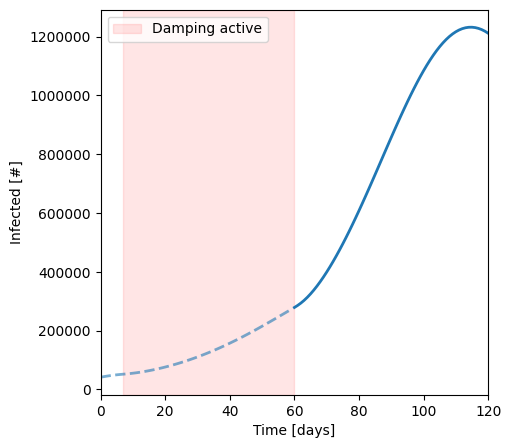

In [126]:
import matplotlib.pyplot as plt

damping_day = 7
change_day = 60
state = "InfectedSymptoms"

fig, ax = plt.subplots(figsize=(5, 5))

# Plot first 60 days with transparency
df[state].iloc[:change_day].plot(ax=ax, lw=2, alpha=0.6, color='tab:blue', linestyle="--", label='_nolegend_')

# Plot the rest normally
df[state].iloc[change_day:].plot(ax=ax, lw=2, color='tab:blue', alpha=1.0, label='_nolegend_')

#df["InfectedNoSymptoms"].plot(ax=ax, lw=2, label="InfectedNoSymptoms")

plt.xlabel("Time [days]")
plt.ylabel("Infected [#]")
plt.grid(False)

# plt.axvline(damping_day, color="red", linestyle="--", lw=2)
# plt.annotate("Damping introduced",
#              xy=(damping_day, df[state].max()*0.8),
#              xytext=(damping_day+1, df[state].max()*0.85),
#              arrowprops=dict(arrowstyle="->", color="red"),
#              color="red")

# plt.axvline(change_day, color="gray", linestyle="--", lw=2)

plt.axvspan(damping_day, change_day, color="red", alpha=0.1, label="Damping active")
# plt.axvspan(change_day, df.index.max(), color="red", alpha=0.2)
ax.set_xlim(0, 120)
ax.ticklabel_format(style='plain', axis='y')

plt.legend(loc='upper left')
plt.show()

In [127]:
df = preprocess_data("../build/result4.h5")

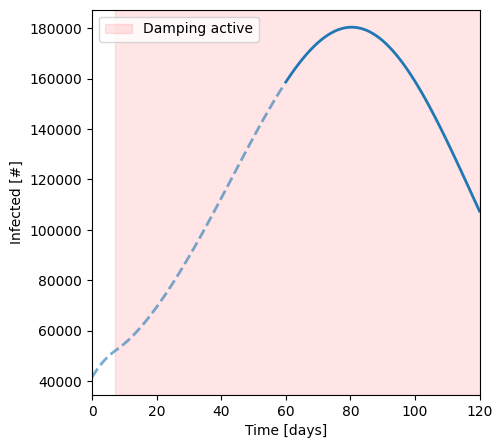

In [128]:
state = "InfectedSymptoms"

fig, ax = plt.subplots(figsize=(5, 5))

# Plot first 60 days with transparency
df[state].iloc[:60].plot(ax=ax, lw=2, alpha=0.6, color='tab:blue', linestyle="--", label='_nolegend_')

# Plot the rest normally
df[state].iloc[60:].plot(ax=ax, lw=2, color='tab:blue', alpha=1.0, label='_nolegend_')

# Optional: style
plt.xlabel("Time [days]")
plt.ylabel("Infected [#]")
plt.grid(False)

plt.axvspan(damping_day, df.index.max(), color="red", alpha=0.1, label="Damping active")

ax.set_xlim(0, 120)
# ax.set_ylim(bottom=None, top=df[state].max()*1.05)
plt.legend(loc='upper left')
plt.show()

In [129]:
df = preprocess_data("../build/result5.h5")

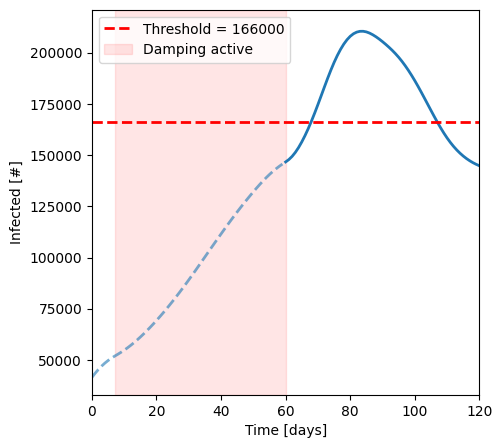

In [130]:
state = "InfectedSymptoms"
threshold = 200 * 830   # your threshold value

fig, ax = plt.subplots(figsize=(5, 5))

# Plot first 60 days with transparency
df[state].iloc[:60].plot(ax=ax, lw=2, alpha=0.6, color='tab:blue', linestyle="--", label='_nolegend_')

# Plot the rest normally
df[state].iloc[60:].plot(ax=ax, lw=2, color='tab:blue', alpha=1.0, label='_nolegend_')

# Add horizontal threshold line
ax.axhline(y=threshold, color='red', linestyle='--', lw=2, label=f"Threshold = {threshold}")

# ax.fill_between(
#     df.index,
#     threshold,                 # start shading at threshold
#     df[state].max()*1.05,      # end slightly above max for clarity
#     color='red',
#     alpha=0.1
# )

plt.axvspan(damping_day, change_day, color="red", alpha=0.1, label="Damping active")

# Optional: style
ax.set_xlabel("Time [days]")
plt.ylabel("Infected [#]")
plt.grid(False)

ax.legend(loc='upper left')
ax.set_xlim(0, 120)
ax.set_ylim(bottom=None, top=df[state].max()*1.05)
plt.show()